# KNN (K Nearest Neighbours) Classification

In [1]:
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['Class'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
y.value_counts()

0    50
1    50
2    50
Name: Class, dtype: int64

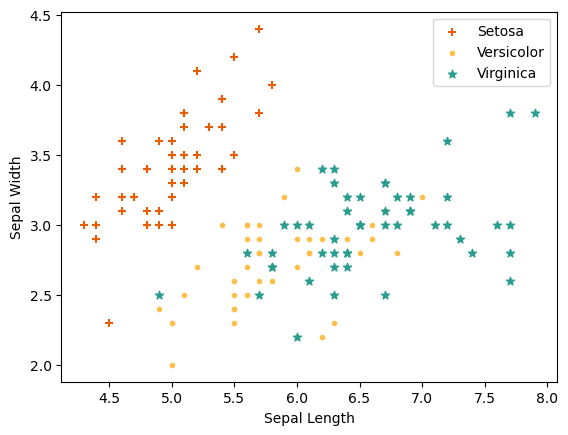

In [6]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.scatter(df[df['Class'] == 0]['sepal length (cm)'], df[df['Class'] == 0]['sepal width (cm)'], color = '#e85d04', marker = '+', label = 'Setosa')
plt.scatter(df[df['Class'] == 1]['sepal length (cm)'], df[df['Class'] == 1]['sepal width (cm)'], color = '#fcbf49', marker = '.', label = 'Versicolor')
plt.scatter(df[df['Class'] == 2]['sepal length (cm)'], df[df['Class'] == 2]['sepal width (cm)'], color = '#2a9d8f', marker = '*', label = 'Virginica')
plt.legend()

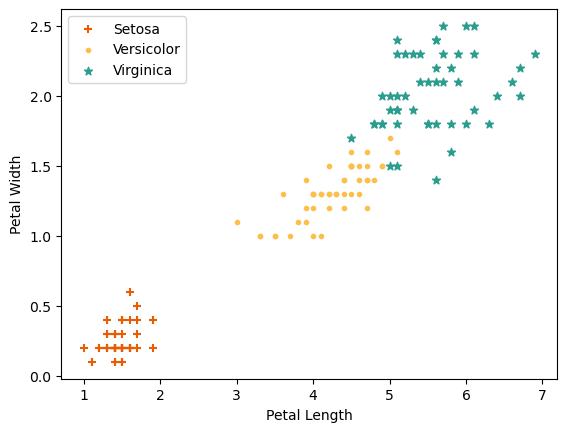

In [7]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.scatter(df[df['Class'] == 0]['petal length (cm)'], df[df['Class'] == 0]['petal width (cm)'], color = '#e85d04',marker = '+', label = 'Setosa')
plt.scatter(df[df['Class'] == 1]['petal length (cm)'], df[df['Class'] == 1]['petal width (cm)'], color = '#fcbf49', marker = '.', label = 'Versicolor')
plt.scatter(df[df['Class'] == 2]['petal length (cm)'], df[df['Class'] == 2]['petal width (cm)'], color = '#2a9d8f', marker = '*', label = 'Virginica')

plt.legend()

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, train_size = 0.2, random_state = 42)

### KNN Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=10)

In [10]:
knn.score(X_test , y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9083333333333333

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


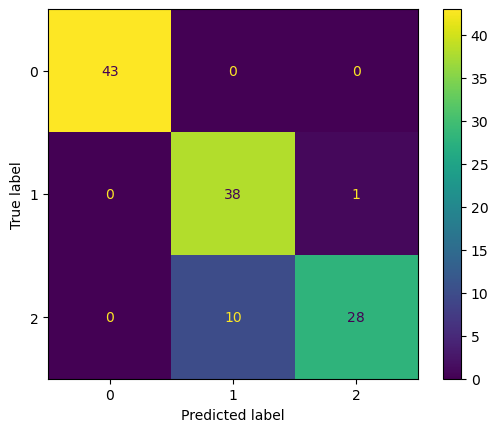

In [11]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test , y_pred)
ConfusionMatrixDisplay(cm).plot()